# Covid-19: Vigilancia epidemiológica para Cuba

Fecha de actualización: 2020-05-06

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/covid19cubadata/covid19cubadata.github.io/master/data/covid19-casos.csv'
df = pd.read_csv(url, sep=',', decimal='.', error_bad_lines=False)
df['fecha_confirmacion'] = pd.to_datetime(df['fecha_confirmacion'], format='%Y/%m/%d')
df['caso'] = 1
df.head()

,caso,sexo,edad,pais,municipio,provincia,fecha_confirmacion,fecha_ingreso,tipo_contagio
0,1,hombre,61,it,Trinidad,Sancti Spíritus,2020-03-11,2020/03/10,primario
1,1,mujer,57,it,Trinidad,Sancti Spíritus,2020-03-11,2020/03/10,primario
2,1,mujer,60,it,Trinidad,Sancti Spíritus,2020-03-11,2020/03/10,primario
3,1,hombre,25,cu,Santa Clara,Villa Clara,2020-03-13,2020/03/08,secundario
4,1,hombre,63,cu,Diez de Octubre,La Habana,2020-03-16,2020/03/12,secundario


In [3]:
df.tail()

,caso,sexo,edad,pais,municipio,provincia,fecha_confirmacion,fecha_ingreso,tipo_contagio
1978,1,mujer,53,cu,Boyeros,La Habana,2020-05-27,NaN,secundario
1979,1,hombre,50,cu,San Miguel del Padrón,La Habana,2020-05-27,NaN,secundario
1980,1,hombre,55,cu,Habana del Este,La Habana,2020-05-27,NaN,desconocido
1981,1,mujer,39,cu,Playa,La Habana,2020-05-27,NaN,secundario
1982,1,hombre,44,cu,Matanzas,Matanzas,2020-05-27,NaN,secundario


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1983 entries, 0 to 1982
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   caso                1983 non-null   int64         
 1   sexo                1983 non-null   object        
 2   edad                1983 non-null   int64         
 3   pais                1983 non-null   object        
 4   municipio           1983 non-null   object        
 5   provincia           1983 non-null   object        
 6   fecha_confirmacion  1983 non-null   datetime64[ns]
 7   fecha_ingreso       277 non-null    object        
 8   tipo_contagio       1983 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 139.6+ KB


In [276]:
df[df['fecha_ingreso']=='2020/30/30'] # parece que hay un error con la fecha de ingreso

,caso,sexo,edad,pais,municipio,provincia,fecha_confirmacion,fecha_ingreso,tipo_contagio
247,1,mujer,22,cu,Cotorro,La Habana,2020-04-02,2020/30/30,secundario


## Total de casos nuevos y acumulados diarios en Cuba

In [5]:
df_cuba = (df.groupby(['fecha_confirmacion']).agg({'caso': sum}).reset_index()
           .rename(columns={'caso': 'casos_diarios'}))
df_cuba['casos_acumulados'] = df_cuba['casos_diarios'].cumsum()
df_cuba.tail()

,fecha_confirmacion,casos_diarios,casos_acumulados
70,2020-05-23,10,1941
71,2020-05-24,6,1947
72,2020-05-25,16,1963
73,2020-05-26,11,1974
74,2020-05-27,9,1983


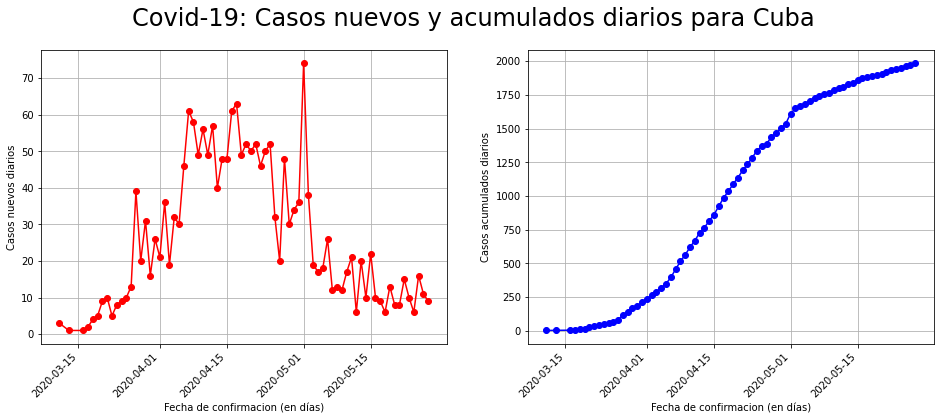

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
plt.suptitle('Covid-19: Casos nuevos y acumulados diarios para Cuba', fontsize=24)
ax[0].plot(df_cuba['fecha_confirmacion'], df_cuba['casos_diarios'], 'ro-', label='Observed')
ax[0].set(xlabel='Fecha de confirmacion (en días)')
ax[0].set(ylabel='Casos nuevos diarios')
ax[0].grid(True)
ax[1].plot(df_cuba['fecha_confirmacion'], df_cuba['casos_acumulados'], 'bo-', label='Observed')
ax[1].set(xlabel='Fecha de confirmacion (en días)')
ax[1].set(ylabel='Casos acumulados diarios')
ax[1].grid(True)
fig.autofmt_xdate(rotation=45)
plt.show()

## Provincias más afectadas

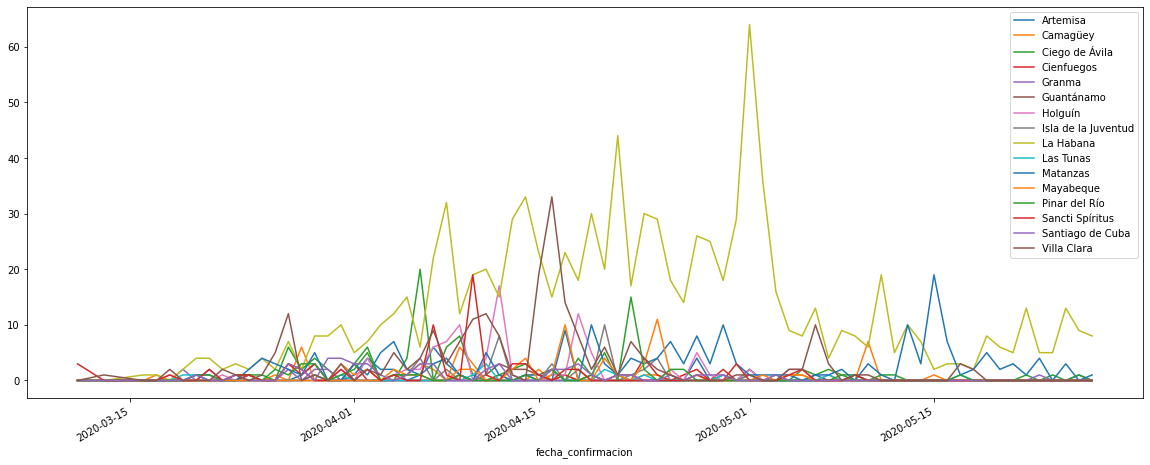

In [7]:
df_prov = df.groupby(['provincia','fecha_confirmacion']).agg({'caso': sum}).unstack(level=0)
df_prov.columns=df_prov.columns.map(lambda x: x[1])
df_prov = df_prov.fillna(0)
df_prov.plot(figsize=(20,8));

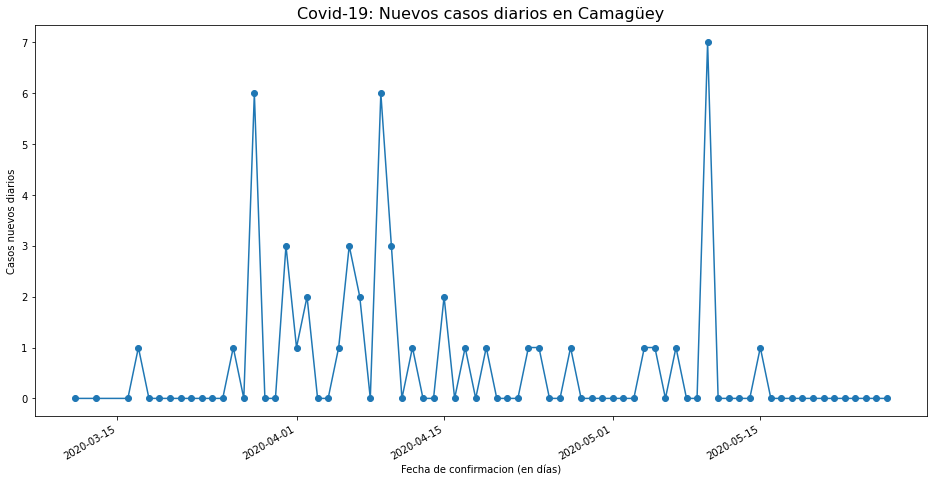

In [8]:
ax = df_prov['Camagüey'].plot(marker='o',figsize=(16,8))
ax.set(xlabel='Fecha de confirmacion (en días)')
ax.set(ylabel='Casos nuevos diarios')
ax.set_title('Covid-19: Nuevos casos diarios en Camagüey', fontsize=16)
plt.show()

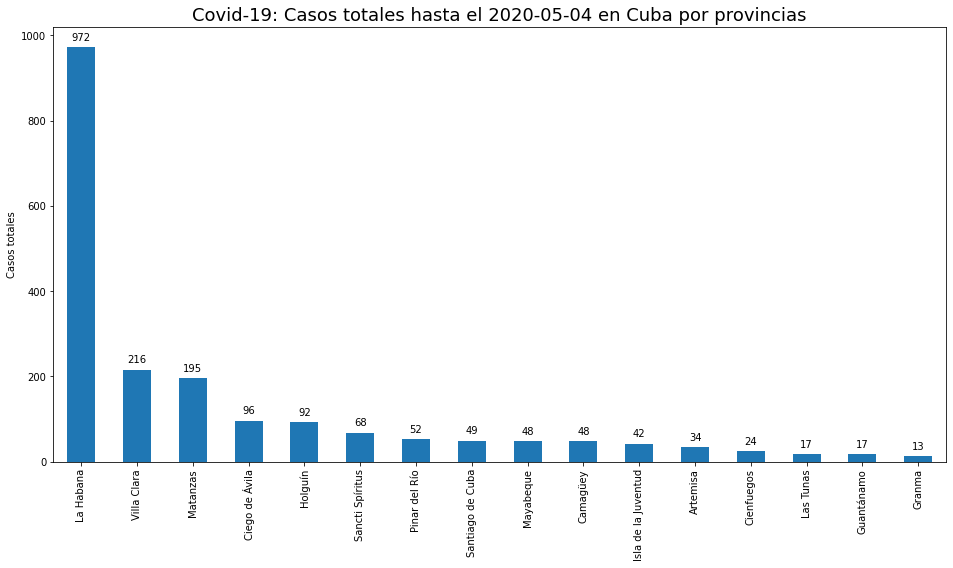

In [9]:
# np.round(p.get_height(),decimals=2)
ax = df_prov.sum().sort_values(ascending=False).map(lambda x: int(x)).plot(kind='bar', figsize=(16,8))
for p in ax.patches: 
    ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set(ylabel='Casos totales')
ax.set_title("Covid-19: Casos totales hasta el 2020-05-04 en Cuba por provincias", fontsize=18)
plt.show()

## Detalles sobre los casos por provincias

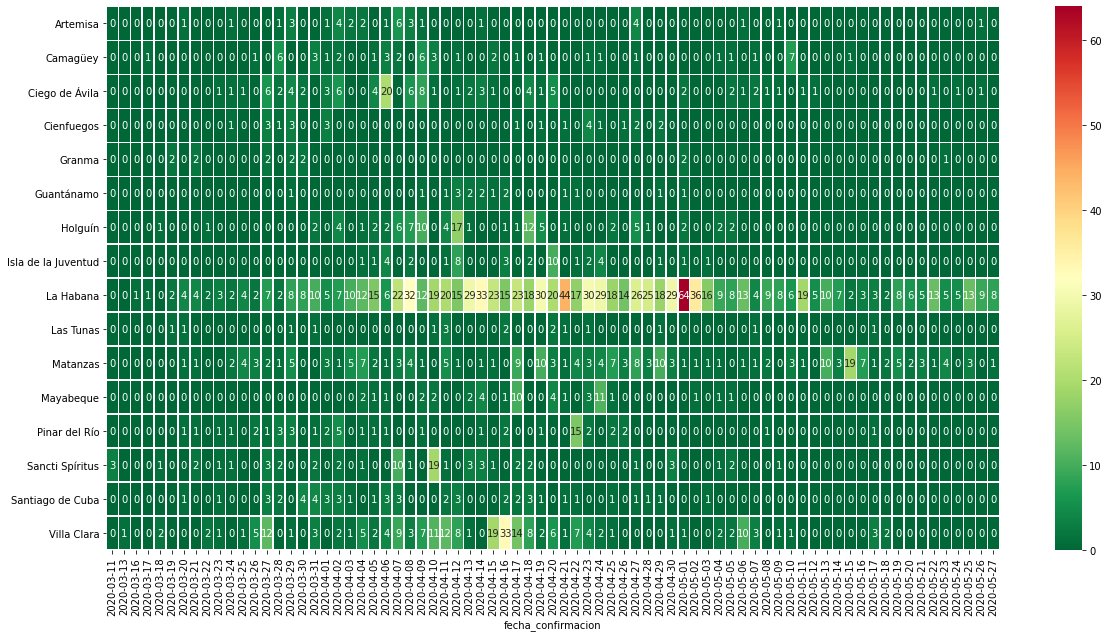

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_prov.T, annot=True, cmap='RdYlGn_r', linewidths=0.5, ax=ax)
ax.set_xticklabels([i.strftime("%Y-%m-%d") for i in df_prov.index], rotation=90)
plt.show()

## Municipios de la Habana más afectados

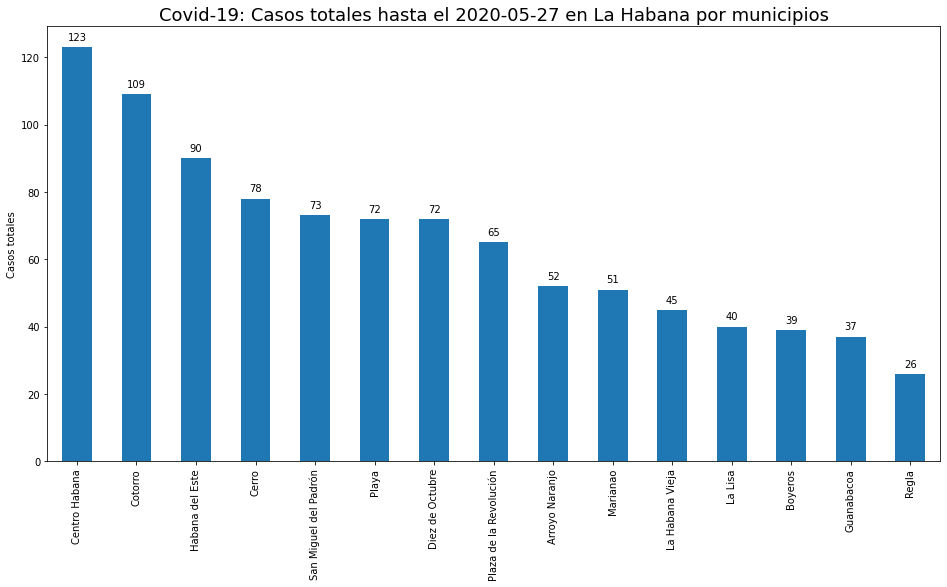

In [11]:
df_hab_municipios = (df[df.provincia=='La Habana'].groupby(['provincia','municipio','fecha_confirmacion'])
                     .agg({'caso': sum}).unstack(level=1).fillna(0))
df_hab_municipios.columns = df_hab_municipios.columns.map(lambda x: x[1])
df_hab_municipios.index = df_hab_municipios.index.map(lambda x: x[1])
date_until = str(df_hab_municipios.index[-1])[:10]
ax = df_hab_municipios.sum().sort_values(ascending=False).map(lambda x: int(x)).plot(kind='bar', figsize=(16,8))
for p in ax.patches: 
    ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set(ylabel='Casos totales')
ax.set_title("Covid-19: Casos totales hasta el {} en La Habana por municipios".format(date_until), fontsize=18)
plt.show()

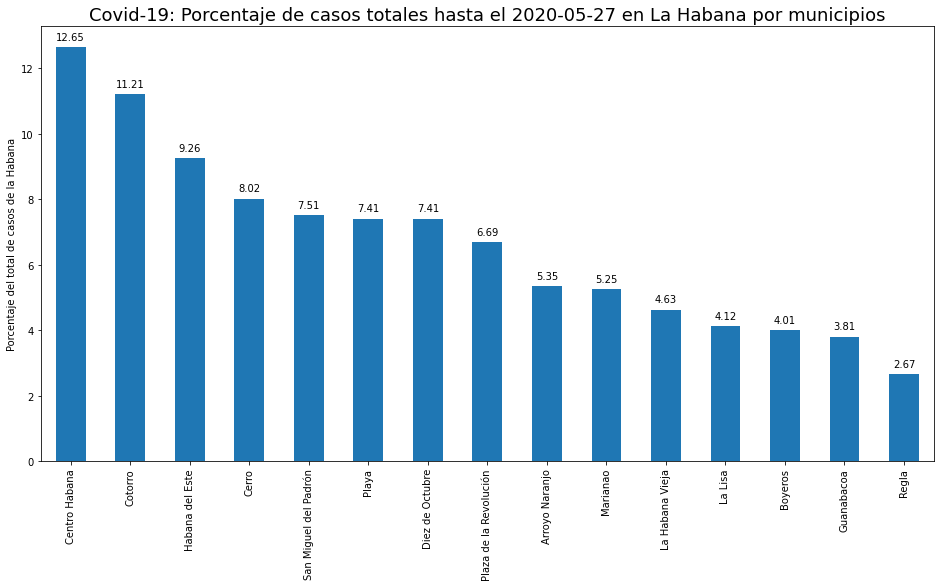

In [12]:
ax = (100*df_hab_municipios.sum()/df_hab_municipios.sum().sum()).sort_values(ascending=False).round(2).plot(kind='bar', figsize=(16,8))
for p in ax.patches: 
    ax.annotate(p.get_height(), (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set(ylabel='Porcentaje del total de casos de la Habana')
ax.set_title("Covid-19: Porcentaje de casos totales hasta el {} en La Habana por municipios".format(date_until), fontsize=18)
plt.show()

Por el momento, los municipios más afectados de La Habana han sido Cotorro y Centro Habana, alcanzando los 100 y 99 casos, respectivamente. Dichos municipios representan el 12.48% y 12.36% de los 801 casos de La Habana.

## Detalle sobre los casos en La Habana por municipios

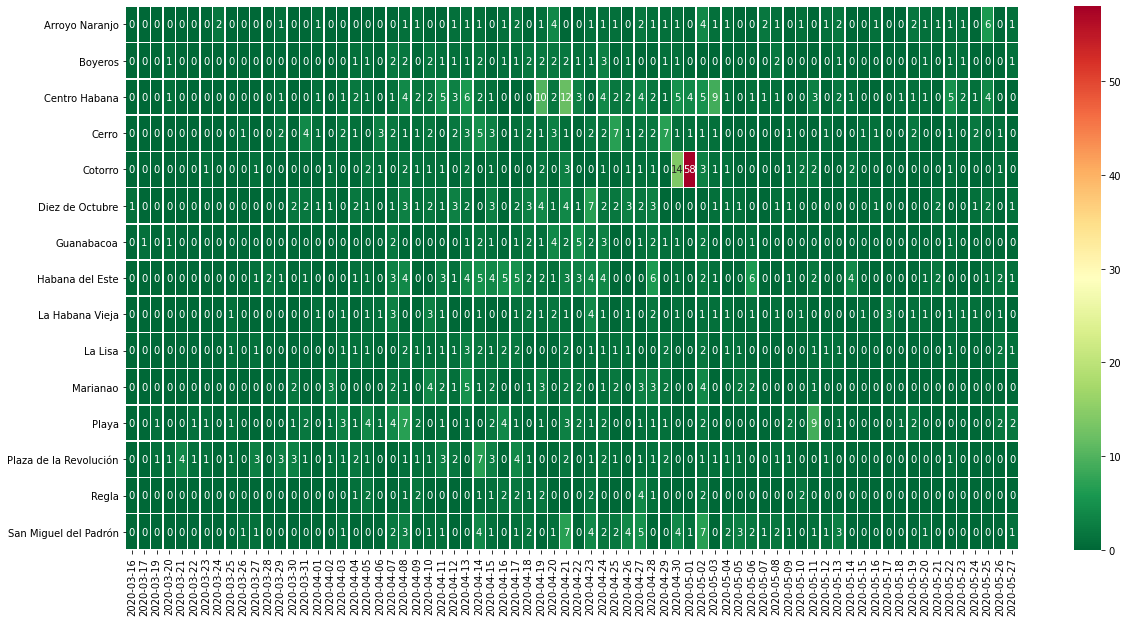

In [13]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_hab_municipios.T, annot=True, cmap='RdYlGn_r', linewidths=0.5, ax=ax)
ax.set_xticklabels([i.strftime("%Y-%m-%d") for i in df_hab_municipios.index], rotation=90)
plt.show()

## Evolución de los casos nuevos diarios en Cuba por sexo

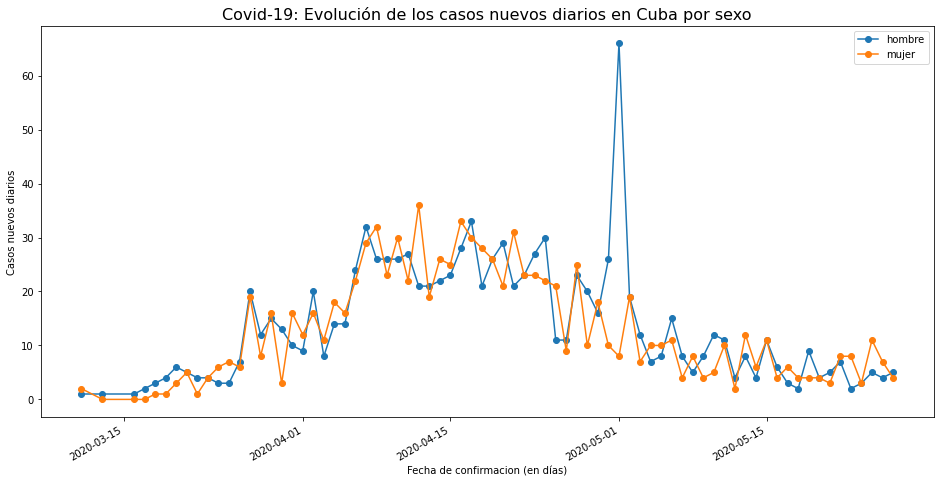

In [14]:
df_sexo = (df.groupby(['sexo','fecha_confirmacion']).agg({'caso': sum})
           .unstack(level=0).fillna(0))
df_sexo.columns = df_sexo.columns.map(lambda x: x[1])
ax = df_sexo.plot(marker='o',figsize=(16,8))
ax.set(xlabel='Fecha de confirmacion (en días)')
ax.set(ylabel='Casos nuevos diarios')
ax.set_title('Covid-19: Evolución de los casos nuevos diarios en Cuba por sexo', fontsize=16)
plt.show()

## Detalle de los casos nuevos diarios por provincia y sexo

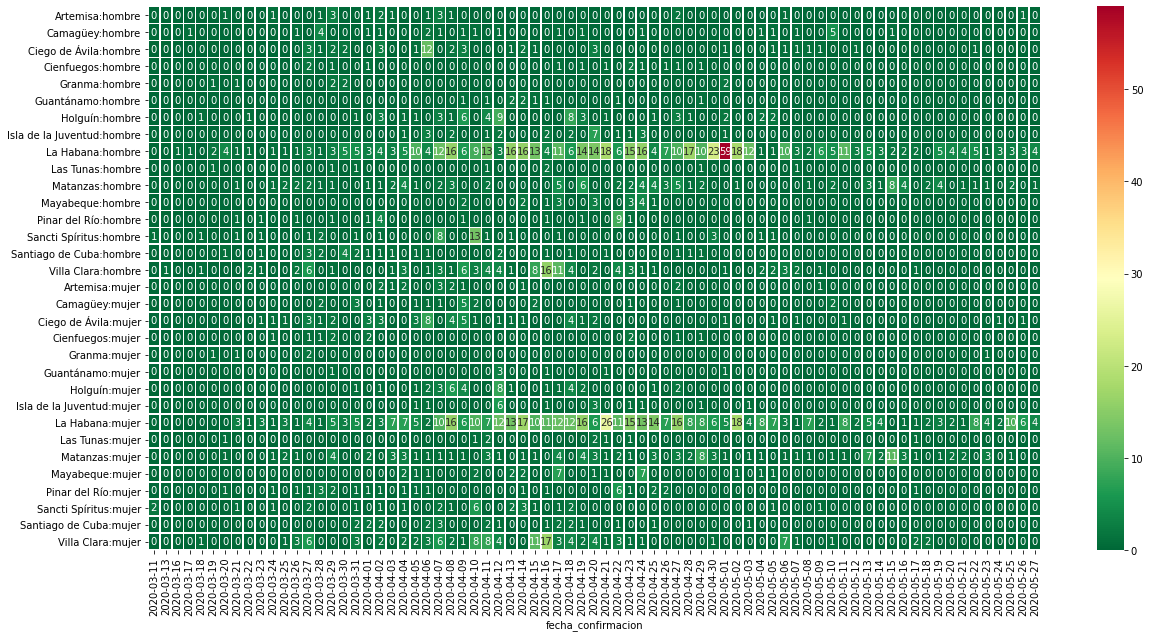

In [15]:
df_prov_sexo = (df.groupby(['sexo','provincia','fecha_confirmacion']).agg({'caso': sum})
                .unstack(level=0).unstack(level=0).fillna(0))
df_prov_sexo.columns = df_prov_sexo.columns.map(lambda x: x[2]+':'+x[1])
#df_prov_sexo['proporcion_hombre'] = df_prov_sexo['hombre']/(df_prov_sexo['hombre'] + df_prov_sexo['mujer'])

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_prov_sexo.T, annot=True, cmap='RdYlGn_r', linewidths=0.5, ax=ax)
ax.set_xticklabels([i.strftime("%Y-%m-%d") for i in df_prov_sexo.index], rotation=90)
plt.show()

Se puede ver que el pico discordante del día 2020-05-01, se debe principalmente a hombres ubicados en La Habana, fundamentalmente en el Cotorro.

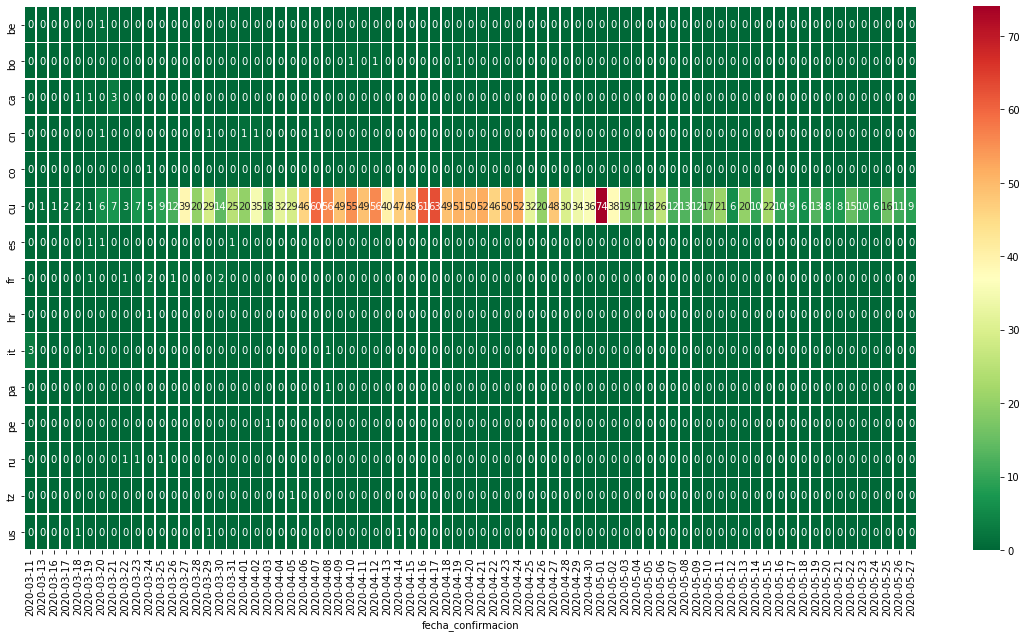

In [16]:
df_pais = (df.groupby(['pais','fecha_confirmacion']).agg({'caso': sum})
           .unstack(level=0).fillna(0))
df_pais.columns = df_pais.columns.map(lambda x: x[1])
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df_pais.T, annot=True, cmap='RdYlGn_r', linewidths=0.5, ax=ax)
ax.set_xticklabels([i.strftime("%Y-%m-%d") for i in df_pais.index], rotation=90)
plt.show()

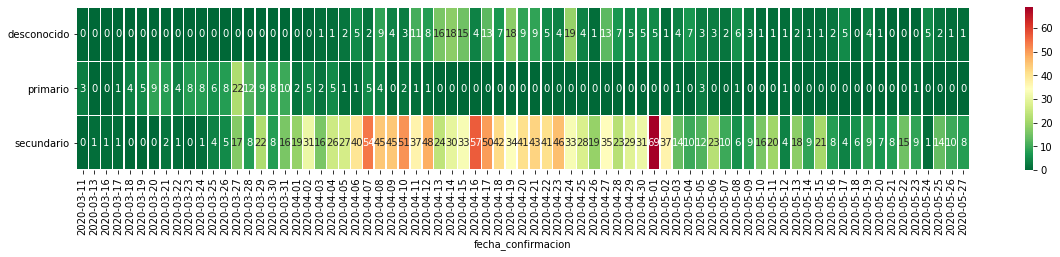

In [17]:
df_tipo = (df.groupby(['tipo_contagio','fecha_confirmacion']).agg({'caso': sum})
           .unstack(level=0).fillna(0))
df_tipo.columns = df_tipo.columns.map(lambda x: x[1])
fig, ax = plt.subplots(figsize=(20,3))
sns.heatmap(df_tipo.T, annot=True, cmap='RdYlGn_r', linewidths=0.5, ax=ax)
ax.set_xticklabels([i.strftime("%Y-%m-%d") for i in df_tipo.index], rotation=90)
plt.show()

## Distribución de la edad de los contagiados

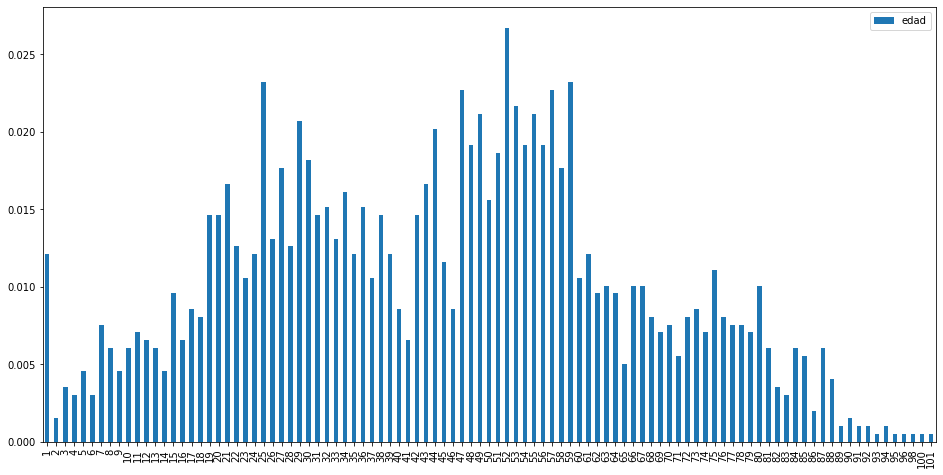

In [18]:
df['edad'].value_counts(normalize=True).to_frame().sort_index().plot(kind='bar', figsize=(16,8));

## Distribución de la edad de los contagiados por provincia

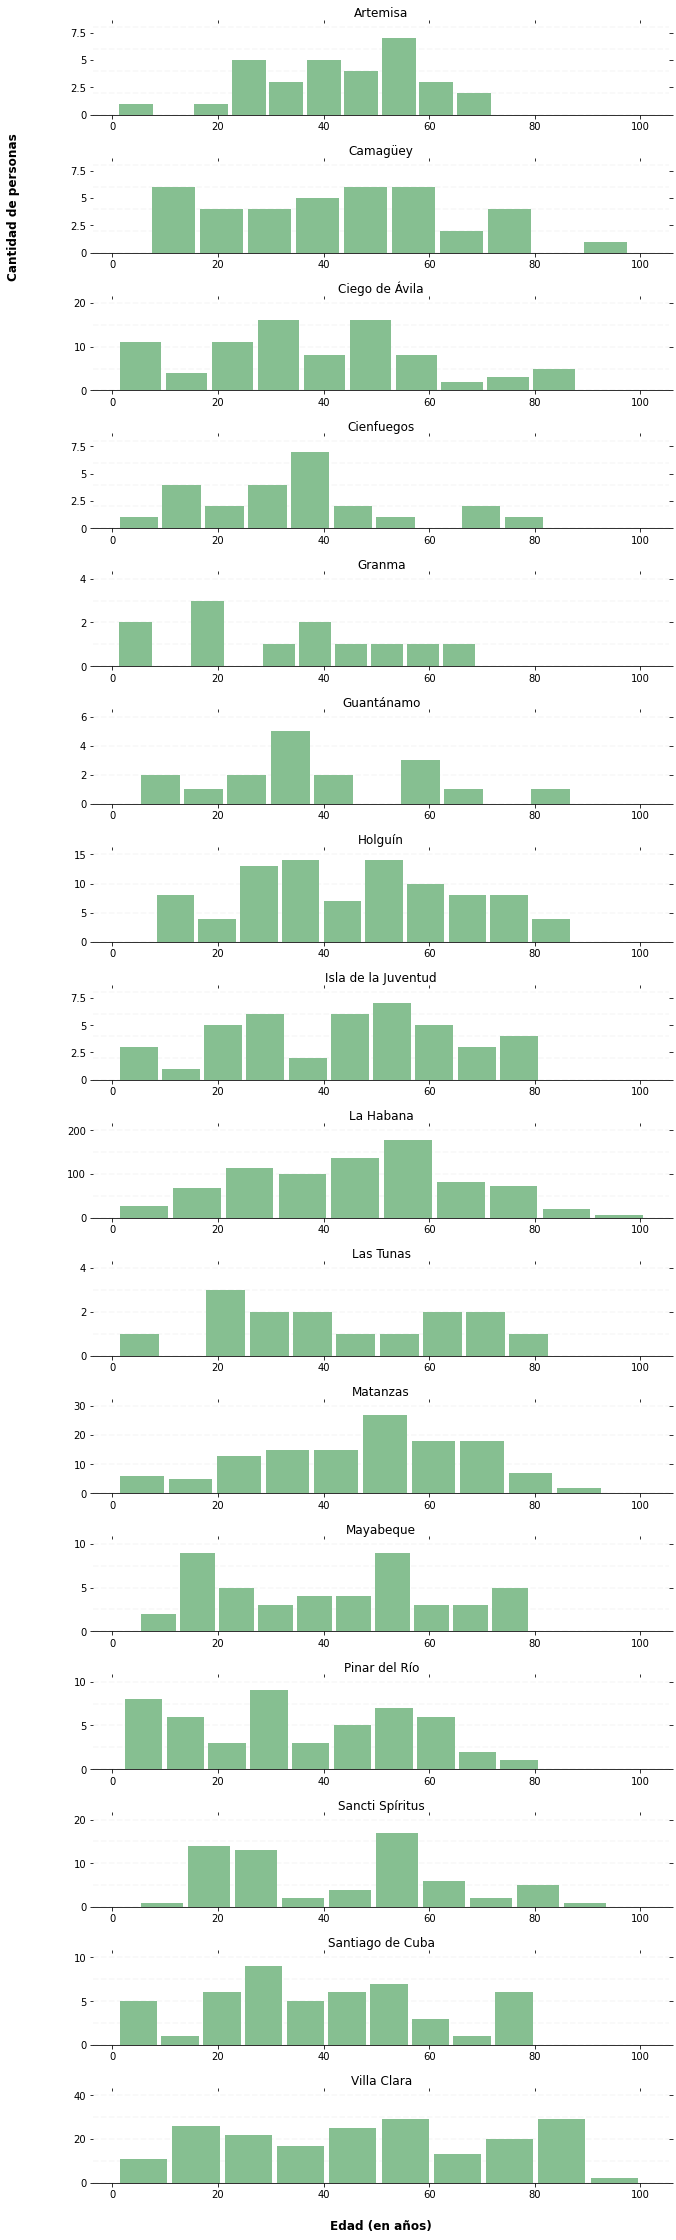

In [258]:
ax = df.hist(column='edad', by='provincia', bins=10, grid=False, figsize=(10,40), layout=(16,1), sharex=True, color='#86bf91', zorder=2, rwidth=0.9)

for i,x in enumerate(ax):

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    x.set_xlabel("Edad (en años)", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    if i == 1:
        x.set_ylabel("Cantidad de personas", labelpad=50, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

    x.tick_params(axis='x', rotation=0)

## Detalle de la evalución del número de contagios por grupos de edad

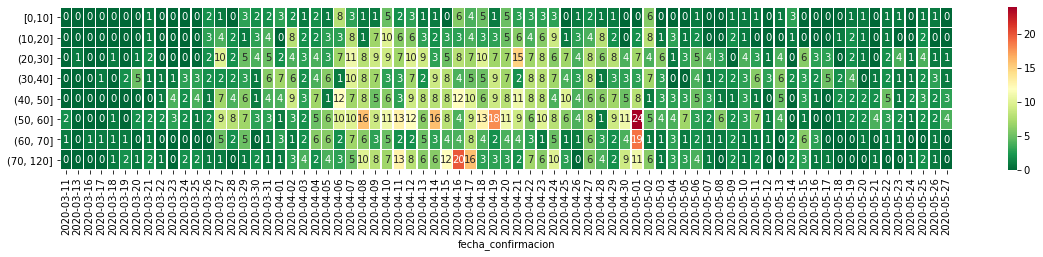

In [19]:
# Agrupando la edad de os contagiados
cut_labels = ['[0,10]', '(10,20]', '(20,30]', '(30,40]', '(40, 50]','(50, 60]','(60, 70]','(70, 120]']
cut_bins = [0, 10, 20, 30, 40, 50, 60, 70, 120]
df['edad_cut'] = pd.cut(df['edad'], bins=cut_bins, labels=cut_labels, include_lowest=True)

# heatmap
df_edad = (df.groupby(['edad_cut','fecha_confirmacion']).agg({'caso': sum})
           .unstack(level=0).fillna(0))
df_edad.columns = df_edad.columns.map(lambda x: x[1])
fig, ax = plt.subplots(figsize=(20,3))
sns.heatmap(df_edad.T, annot=True, cmap='RdYlGn_r', linewidths=0.5, ax=ax)
ax.set_xticklabels([i.strftime("%Y-%m-%d") for i in df_edad.index], rotation=90)
plt.show()

## Otros gráficos de interés

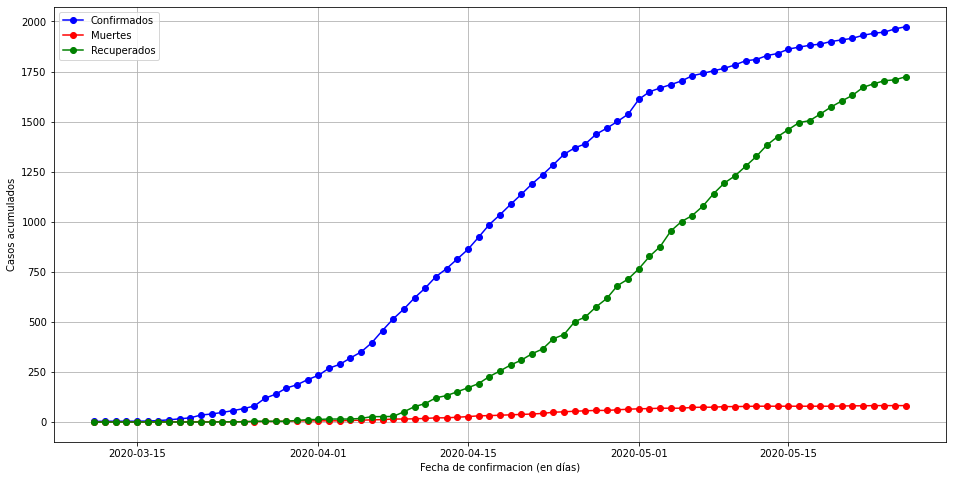

In [20]:
import requests
def get_json_info():
    countries = requests.get('https://pomber.github.io/covid19/timeseries.json').json()
    inf = {}
    back_inf = {}
    fecha = '2020-1-22'
    for c in countries:
        data = []
        deaths = []
        recovered = []
        started = False
        for day in countries[c]:
            if not started:
                if day['confirmed'] != 0:
                    started = True
                    data.append(day['confirmed'])
                    deaths.append(day['deaths'])
                    recovered.append(day['recovered'])
                    fecha = day["date"]
            else:
                data.append(day['confirmed'])
                deaths.append(day['deaths'])
                recovered.append(day['recovered'])
                fecha = day["date"]
        back_inf[c] = data
        inf[c] = {'confirmed': data, 'deaths': deaths, 'recovered': recovered}
    c = {"paises": back_inf, "paises_info": inf,
         "dia-actualizacion": fecha}
    return c

json_data = get_json_info()
start_date = str(df_cuba['fecha_confirmacion'][0])[:10]
nperiods = len(json_data["paises_info"]['Cuba']['confirmed'])
df_cuba2 = pd.DataFrame(json_data["paises_info"]['Cuba'], 
             index=pd.date_range(start=start_date, periods=nperiods))
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(df_cuba2.index, df_cuba2['confirmed'], 'bo-', label='Confirmados')
ax.plot(df_cuba2.index, df_cuba2['deaths'], 'ro-', label='Muertes')
ax.plot(df_cuba2.index, df_cuba2['recovered'], 'go-', label='Recuperados')
ax.set(xlabel='Fecha de confirmacion (en días)')
ax.set(ylabel='Casos acumulados')
ax.grid(True)
ax.legend()
plt.show()

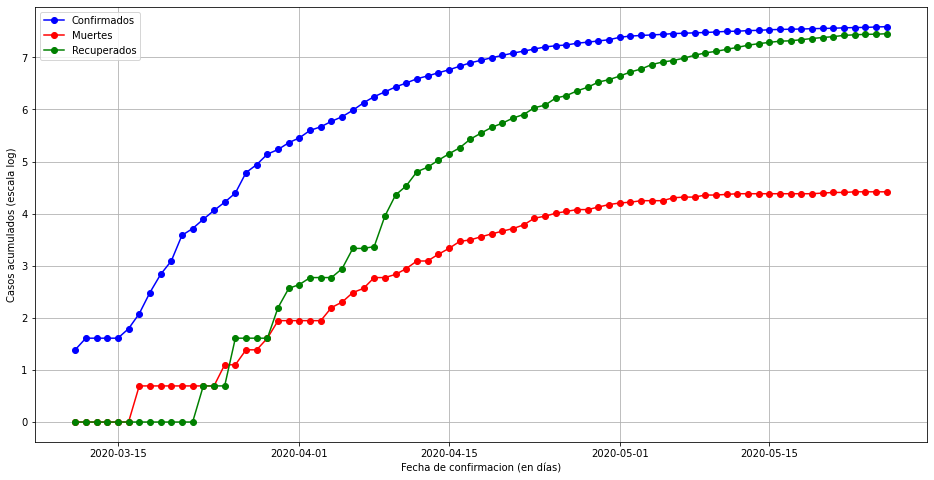

In [21]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(df_cuba2.index, df_cuba2['confirmed'].map(lambda x: np.log(x + 1)), 'bo-', label='Confirmados')
ax.plot(df_cuba2.index, df_cuba2['deaths'].map(lambda x: np.log(x + 1)), 'ro-', label='Muertes')
ax.plot(df_cuba2.index, df_cuba2['recovered'].map(lambda x: np.log(x + 1)), 'go-', label='Recuperados')
ax.set(xlabel='Fecha de confirmacion (en días)')
ax.set(ylabel='Casos acumulados (escala log)')
ax.grid(True)
ax.legend()
plt.show()

In [22]:
url = 'https://raw.githubusercontent.com/covid19cubadata/covid19cubadata.github.io/master/data/covid19-cuba.json'
json_cuba = requests.get(url).json()

In [23]:
json_cuba.keys()

dict_keys(['schema-version', 'note-text', 'numero-reproductivo', 'eventos', 'centros_aislamiento', 'centros_diagnostico', 'casos'])

In [24]:
for k in json_cuba['casos']['dias'].keys():
    print(list(json_cuba['casos']['dias'][k].keys()))

['fecha', 'diagnosticados', 'sujetos_riesgo']
['fecha']
['fecha', 'diagnosticados']
['fecha']
['fecha', 'graves_numero', 'graves_id']
['fecha', 'diagnosticados', 'sujetos_riesgo']
['fecha', 'diagnosticados', 'sujetos_riesgo']
['fecha', 'diagnosticados', 'muertes_numero', 'muertes_id', 'sujetos_riesgo']
['fecha', 'diagnosticados', 'sujetos_riesgo']
['fecha', 'diagnosticados', 'evacuados_numero', 'evacuados_id', 'graves_numero', 'graves_id', 'sujetos_riesgo']
['fecha', 'diagnosticados', 'sujetos_riesgo']
['fecha', 'diagnosticados', 'sujetos_riesgo', 'tests_total']
['fecha', 'diagnosticados', 'sujetos_riesgo', 'recuperados_numero', 'recuperados_id', 'tests_total']
['fecha', 'diagnosticados', 'sujetos_riesgo', 'graves_numero', 'tests_total']
['fecha', 'diagnosticados', 'sujetos_riesgo', 'graves_numero', 'tests_total']
['fecha', 'diagnosticados', 'recuperados_numero', 'muertes_numero', 'muertes_id', 'tests_total']
['fecha', 'diagnosticados', 'sujetos_riesgo', 'muertes_numero', 'tests_total'

In [25]:
json_cuba['casos']['dias']['8']['muertes_id']

['it-1']

In [26]:
json_data["paises_info"].keys()

dict_keys(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'K

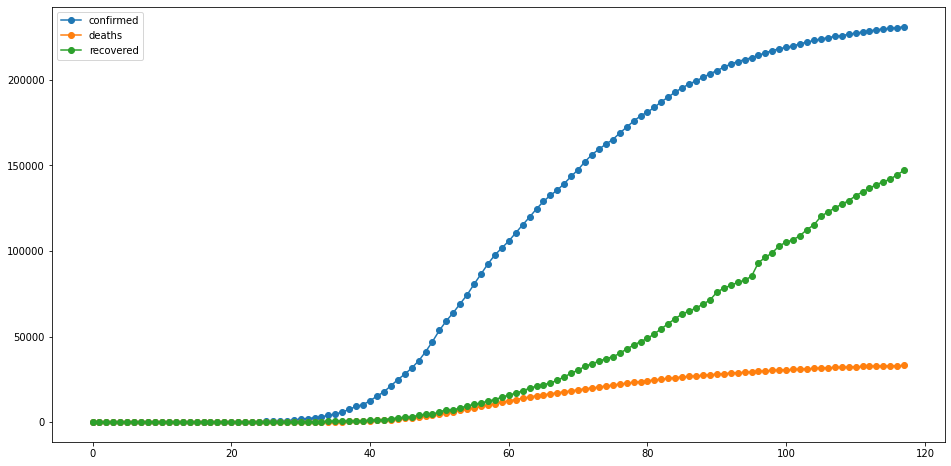

In [29]:
pd.DataFrame(json_data["paises_info"]['Italy']).plot(marker='o',figsize=(16,8));